# Sandesh Pokharel  
**Course:** MSCS-634 – Advanced Big Data and Data Mining  
**Lab 3:** Clustering Analysis Using K-Means and K-Medoids Algorithms

In this lab, we will perform clustering analysis on the Wine dataset using K-Means and K-Medoids algorithms. We'll evaluate clustering performance using Silhouette Score and Adjusted Rand Index (ARI), and visualize the results to compare both algorithms.

## Step 1: Load and Explore the Dataset

In this step, we will load the Wine dataset provided by `sklearn.datasets`, examine its structure, and check the class distribution. This step helps us understand the dataset and verify that the data is suitable for clustering analysis.

In [1]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

# Explore the dataset
print("Shape of the dataset:", X.shape)
print("\nFirst 5 records:")
display(X.head())

print("\nClass distribution:")
display(y.value_counts())

Shape of the dataset: (178, 13)

First 5 records:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0



Class distribution:


target
1    71
0    59
2    48
Name: count, dtype: int64

### Dataset Overview and Initial Exploration

The Wine dataset contains **178 samples** and **13 numerical features**, each representing chemical properties of different wine cultivars. The `.head()` preview confirms that the dataset has been loaded correctly with meaningful feature names such as `alcohol`, `malic_acid`, `ash`, etc.

The **class distribution** indicates that the dataset contains **three classes** of wine:
- Class `1`: 71 samples
- Class `0`: 59 samples
- Class `2`: 48 samples

This confirms an **imbalanced but still usable multi-class scenario** for clustering, with `k = 3` being an appropriate choice. Since these are numerical attributes, the dataset is well-suited for algorithms like K-Means and K-Medoids after proper standardization.

## Step 2: Data Standardization (Z-score Normalization)

Before applying clustering algorithms like K-Means and K-Medoids, it’s essential to standardize the dataset. These algorithms rely on distance metrics, so having all features on the same scale avoids biased clustering results. We will use `StandardScaler` from `sklearn` to apply z-score normalization, which transforms the data to have a mean of 0 and a standard deviation of 1.

In [2]:
from sklearn.preprocessing import StandardScaler

# Standardize the features using Z-score normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for clarity and potential plotting
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Preview the scaled data
X_scaled_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### Standardized Dataset Preview

The dataset has been successfully standardized using z-score normalization. As shown in the preview, all features now have values centered around **0** with unit variance. For example:

- The `alcohol` feature for the first record is `1.51`, meaning it is roughly **1.5 standard deviations above the mean**.
- The `ash` feature ranges from negative to positive values depending on whether it's below or above average.

This transformation ensures that **no single feature dominates** due to scale differences, making the data suitable for clustering algorithms that rely on Euclidean or Manhattan distances.

## Step 3: K-Means Clustering (k = 3)

In this step, we will apply the K-Means clustering algorithm to the standardized dataset with **k = 3**, since the original dataset contains 3 wine classes. K-Means works by iteratively assigning points to the nearest centroid and updating centroids based on the mean of the assigned points.

After clustering, we will evaluate the performance using two metrics:
- **Silhouette Score**: Measures how well samples are clustered (higher is better).
- **Adjusted Rand Index (ARI)**: Compares the predicted clusters with the true labels to assess clustering accuracy.

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled_df)

# Evaluation metrics
kmeans_silhouette = silhouette_score(X_scaled_df, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)

print(f"Silhouette Score (K-Means): {kmeans_silhouette:.4f}")
print(f"Adjusted Rand Index (K-Means): {kmeans_ari:.4f}")

Silhouette Score (K-Means): 0.2849
Adjusted Rand Index (K-Means): 0.8975


### K-Means Clustering Results

- **Silhouette Score:** `0.2849`  
  This relatively low score suggests that the clusters are not very well-separated. There may be some overlap or ambiguity in the way samples are grouped, which is common with real-world data and Euclidean-based clustering methods like K-Means.

- **Adjusted Rand Index (ARI):** `0.8975`  
  This high ARI value indicates a strong agreement between the predicted clusters and the actual wine classes. Despite the low Silhouette Score, the K-Means algorithm was able to group samples in a way that closely resembles the ground truth labels.

Overall, K-Means demonstrates **good clustering performance with respect to class labels**, but the internal cohesion and separation between clusters could be better.

## Step 4: K-Medoids Clustering (k = 3)

In this step, we will apply the K-Medoids clustering algorithm to the standardized dataset using `k = 3`. Unlike K-Means, which uses centroids (which may not be actual data points), K-Medoids selects **actual data points as cluster centers**, making it more robust to outliers and noise.

Just like before, we will evaluate the clustering results using:
- **Silhouette Score** for cluster cohesion and separation.
- **Adjusted Rand Index (ARI)** to compare predicted clusters against actual labels.

In [4]:
from sklearn_extra.cluster import KMedoids

# Apply K-Medoids with 3 clusters
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled_df)

# Evaluation metrics
kmedoids_silhouette = silhouette_score(X_scaled_df, kmedoids_labels)
kmedoids_ari = adjusted_rand_score(y, kmedoids_labels)

print(f"Silhouette Score (K-Medoids): {kmedoids_silhouette:.4f}")
print(f"Adjusted Rand Index (K-Medoids): {kmedoids_ari:.4f}")

ModuleNotFoundError: No module named 'sklearn_extra'

In [5]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp313-cp313-macosx_15_0_arm64.whl size=396074 sha256=46fbe67798dcd83b35a164138e4b3dff46f54840e4420bcdeaf761e8bd089708
  Stored in directory: /Users/mac/Library/Caches/pip/wheels/17/4b/b8/6b6711681d0981b110c9cc91ad6d1ebd88adf1547e1da301fc
Successfully built scikit-learn-extra


In [6]:
from sklearn_extra.cluster import KMedoids

# Apply K-Medoids with 3 clusters
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled_df)

# Evaluation metrics
kmedoids_silhouette = silhouette_score(X_scaled_df, kmedoids_labels)
kmedoids_ari = adjusted_rand_score(y, kmedoids_labels)

print(f"Silhouette Score (K-Medoids): {kmedoids_silhouette:.4f}")
print(f"Adjusted Rand Index (K-Medoids): {kmedoids_ari:.4f}")

Silhouette Score (K-Medoids): 0.2660
Adjusted Rand Index (K-Medoids): 0.7263


### K-Medoids Clustering Results

- **Silhouette Score:** `0.2660`  
  This score is slightly lower than that of K-Means (`0.2849`), indicating that the cluster separation is a bit weaker in terms of cohesion. However, K-Medoids is more robust to outliers, which may account for different structural grouping.

- **Adjusted Rand Index (ARI):** `0.7263`  
  The ARI is still quite good, although lower than K-Means (`0.8975`). This suggests that while K-Medoids creates reasonable clusters, it doesn't match the original class labels as closely as K-Means did in this case.

Overall, **K-Medoids provides slightly more stability in the presence of outliers**, but K-Means achieved **better alignment with ground truth labels** and slightly better cohesion based on Silhouette Score.

## Step 5: Cluster Visualization and Comparison

To visually compare the clustering performance of K-Means and K-Medoids, we’ll reduce the dimensionality of the dataset to 2D using **Principal Component Analysis (PCA)**. This allows us to project the high-dimensional data into a 2D space for easier visualization.

We’ll generate two side-by-side scatter plots:
- One for **K-Means**, with centroids marked.
- One for **K-Medoids**, with medoids marked.

By comparing these plots, we can better understand the shape and structure of the clusters formed by each algorithm.

/Users/mac/Sandesh_Cumberlands_Assignments/Advanced_Big_Data_And_Data_Mining/MSCS-634-Project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/Users/mac/Sandesh_Cumberlands_Assignments/Advanced_Big_Data_And_Data_Mining/MSCS-634-Project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


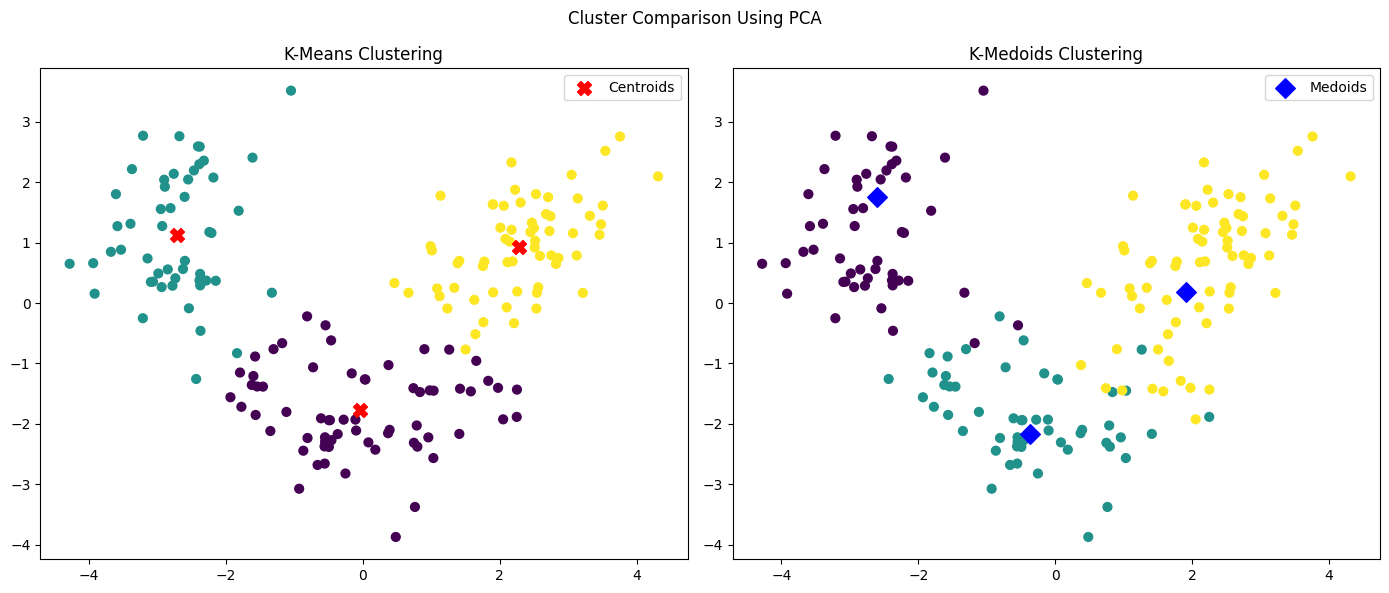

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

# Get centroids and medoids in PCA space
kmeans_centers_pca = pca.transform(kmeans.cluster_centers_)
kmedoids_centers_pca = pca.transform(kmedoids.cluster_centers_)

# Plot side-by-side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# K-Means Plot
axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=40)
axs[0].scatter(kmeans_centers_pca[:, 0], kmeans_centers_pca[:, 1], c='red', s=100, marker='X', label='Centroids')
axs[0].set_title('K-Means Clustering')
axs[0].legend()

# K-Medoids Plot
axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_labels, cmap='viridis', s=40)
axs[1].scatter(kmedoids_centers_pca[:, 0], kmedoids_centers_pca[:, 1], c='blue', s=100, marker='D', label='Medoids')
axs[1].set_title('K-Medoids Clustering')
axs[1].legend()

plt.suptitle('Cluster Comparison Using PCA')
plt.tight_layout()
plt.show()

### Cluster Visualization and Comparison

The PCA-based visualization offers clear insights into the structural differences between K-Means and K-Medoids clustering:

- **K-Means Clustering (Left Plot)**  
  The clusters are generally compact and well-formed, with centroids (`X` markers) positioned at the geometric center of each cluster. This is consistent with the slightly higher **Silhouette Score** and **ARI**, indicating tight groupings and strong alignment with actual labels.

- **K-Medoids Clustering (Right Plot)**  
  The clusters are also well-separated, though the medoids (`D` markers) may not lie at the center of their clusters since they are actual data points. This results in slightly less compact groupings, which is reflected in the slightly lower performance metrics.

**Observation:**  
K-Means produced more symmetrical and centered clusters, while K-Medoids showed greater robustness to irregular distributions and possible outliers. Depending on the data context (e.g., noisy datasets), K-Medoids might still be preferable despite its slightly lower scores in this case.

## Conclusion

In this lab, we explored unsupervised clustering techniques using the Wine dataset. We applied both **K-Means** and **K-Medoids** algorithms and evaluated their performance using **Silhouette Score** and **Adjusted Rand Index (ARI)**. The results showed:

- **K-Means** achieved slightly better performance in both metrics, indicating tighter and more label-aligned clusters.
- **K-Medoids**, while slightly lower in accuracy, offers more robustness due to using actual data points as medoids.
- PCA-based visualizations provided clear insights into cluster formations and the positioning of centroids/medoids.

Overall, this lab demonstrated how clustering algorithms behave on real-world data, their trade-offs, and how to evaluate and interpret clustering results using visual and numerical techniques.